A saúde pública no Brasil é sempre alvo de debates e preocupações. Qual o tamanho de rede de saúde pública? E quantos médicos? Há verba? Quais os atendimentos que o SUS oferece e aonde estão? 

In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(rmarkdown)

In [3]:
install.packages('rworldmap')

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  não foi possível abrir a URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'rworldmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rosangela\AppData\Local\Temp\RtmpERSwut\downloaded_packages


In [4]:
library(rworldmap)

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


In [5]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v readr   1.1.1
v tibble  1.4.2     v purrr   0.2.5
v tidyr   0.8.1     v stringr 1.3.1
v ggplot2 3.0.0     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [10]:
#carregar dados do Brasil, estados, municípios, população referente aos últimos 20 anos. Os cálculos levam em conta natalidade, 
#mortalidade e migração populacional.

brasil <- read.csv2('brazil-population-1998-2017.csv', header = TRUE, encoding='utf8')  

In [11]:
head(brasil)

code,city,state,abbreviation,region,lat,long,year,population
110001,Alta Floresta D'Oeste,RondÃ´nia,RO,NORTE,-11.9283,-61.9953,2014,25652
110001,Alta Floresta D'Oeste,RondÃ´nia,RO,NORTE,-11.9283,-61.9953,2015,25578
110001,Alta Floresta D'Oeste,RondÃ´nia,RO,NORTE,-11.9283,-61.9953,2011,24228
110001,Alta Floresta D'Oeste,RondÃ´nia,RO,NORTE,-11.9283,-61.9953,2009,24354
110001,Alta Floresta D'Oeste,RondÃ´nia,RO,NORTE,-11.9283,-61.9953,2006,29005
110001,Alta Floresta D'Oeste,RondÃ´nia,RO,NORTE,-11.9283,-61.9953,2016,25506


In [10]:
#codificacao <- locale(encoding = "ASCII")

In [11]:
#brasil <- read_csv2('brazil-population-1998-2017.csv', locale = codificacao)

In [12]:
brasil <- brasil %>%
  filter(year == 2017) %>%
  select(code, city, state, region, population) %>%
  distinct()

In [13]:
head(brasil)

code,city,state,region,population
110001,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
110002,Ariquemes,RondÃ´nia,NORTE,107345
110003,Cabixi,RondÃ´nia,NORTE,6224
110004,Cacoal,RondÃ´nia,NORTE,88507
110005,Cerejeiras,RondÃ´nia,NORTE,17934
110006,Colorado do Oeste,RondÃ´nia,NORTE,18467


In [15]:
write.csv2(brasil, 'brasil-2017.csv', row.names = FALSE)

In [16]:
# estabelecimentos de saúde
estabelecimentos <- read.csv2('tbEstabelecimento201809.csv', head=T, sep=';', dec=',', na='')

In [17]:
head(estabelecimentos)

CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TO_CHAR.DT_ATU_GEO..DD.MM.YYYY..,NO_USUARIO_GEO,CO_NATUREZA_JUR,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,TO_CHAR.DT_ATUALIZACAO_ORIGEM..DD.MM.YYYY..
2928707453280,7453280,1.382548e+13,3,3,PREFEITURA MUNICIPAL DE SANTO ANTONIO DE JESUS,POSTO DE SAUDE MINA DO SAPE,COMUNIDADE MINA DO SAPE,S/N,CASA,...,NA,NA,1244,NA,NA,N,NA,NA,M,03/04/2014
2301307450184,7450184,7.539984e+12,3,3,PREFEITURA MUNICIPAL DE SAUDE,ACADEMIA DA SAUDE DE ARARIPE,AV ELISIO ALVES DE ALENCAR,S/N,NA,...,04/09/2018,0130ARA,1244,N,NA,S,NA,NA,M,02/04/2014
2307307462956,7462956,NA,1,1,CONSULTORIO DE PSICOLOGIA FLAVIA GONCALVES MACEDO,CONSULTORIO DE PSICOLOGIA FLAVIA GONCALVES MACEDO,RUA DA CONCEICAO,818,NA,...,27/12/2017,GORETTI,4000,N,NA,S,NA,NA,M,02/04/2014
2313407462476,7462476,7.735178e+12,3,3,PREFEITURA MUNICIPAL DE TIANGUA,U B S DA FAMILIA VALDO DOURADO NUNES,SITIO ITAGUARUNA,S/N,NA,...,NA,NA,1244,N,NA,N,NA,NA,M,02/04/2014
2510107416490,7416490,8.739625e+12,3,3,PREFEITURA MUNICIPAL DE NOVA FLORESTA,NUCLEO DE APOIO A SAUDE DA FAMILIA NASF 2,RUA BENEDITO MARINHO,S/N,NA,...,16/01/2018,FCES,1244,N,NA,S,NA,NA,M,02/04/2014
2515937462123,7462123,1.612771e+12,3,3,PREFEITURA MUNICIPAL DE SERTAOZINHO,AMIGO DO PEITO DE SERTAOZINHO PB,RUA DIRSON ANDRADE,103,NA,...,NA,NA,1244,N,NA,N,NA,NA,M,02/04/2014


In [18]:
estabelecimentos_reduced <- subset(estabelecimentos, 
                                   select = c('CO_UNIDADE','CO_CNES', 
                                              'TP_UNIDADE', 
                                              'CO_MUNICIPIO_GESTOR', 'TP_GESTAO'))

In [19]:
head(estabelecimentos_reduced)

CO_UNIDADE,CO_CNES,TP_UNIDADE,CO_MUNICIPIO_GESTOR,TP_GESTAO
2928707453280,7453280,1,292870,M
2301307450184,7450184,74,230130,M
2307307462956,7462956,22,230730,M
2313407462476,7462476,2,231340,M
2510107416490,7416490,71,251010,M
2515937462123,7462123,36,251593,M


In [20]:
#write.csv2(estabelecimentos, 'estabelecimentos_red.csv', row.names = FALSE)

In [21]:
estabelecimentos_reduced <- merge(estabelecimentos_reduced, brasil, 
                                  by.x = 'CO_MUNICIPIO_GESTOR', 
                                  by.y='code', 
                                  all.x=TRUE)


In [22]:
head(estabelecimentos_reduced)

CO_MUNICIPIO_GESTOR,CO_UNIDADE,CO_CNES,TP_UNIDADE,TP_GESTAO,city,state,region,population
110001,1100017030908,7030908,1,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
110001,1100012369966,2369966,2,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
110001,1100013283577,3283577,70,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
110001,1100016348289,6348289,22,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
110001,1100012679477,2679477,5,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
110001,1100012516500,2516500,5,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437


In [23]:
write.csv2(estabelecimentos_reduced, 'unidades_saude_brasil.csv', row.names = FALSE)

In [24]:
# código do tipo de gestão
gestao <- read.csv2('tbGestao201809.csv', header = TRUE)

In [25]:
head(gestao)

CO_GESTAO,DS_GESTAO,TP_PROG
1,ATENCAO BASICA,1
2,MEDIA COMPLEXIDADE,1
3,INTERNACAO,2
4,ALTA COMPLEXIDADE,1
5,MEDIA COMPLEXIDADE,2
6,ALTA COMPLEXIDADE,2


In [26]:
estab_gestao <- read.csv2('rlEstabProgFundo201809.csv', header = TRUE)

In [28]:
head(estab_gestao)

CO_UNIDADE,CO_ATIVIDADE,TP_ESTADUAL_MUNICIPAL,TO_CHAR.DT_ATUALIZACAO..DD.MM.YYYY..,CO_USUARIO,TO_CHAR.DT_ATUALIZACAO_ORIGEM..DD.MM.YYYY..
4201709209662,0,2,08/09/2017,SAUDE,NA
3104809174745,0,2,18/10/2017,SCNES,NA
1502939210164,0,2,01/10/2018,12345,NA
5004309224769,0,2,02/02/2018,SAUDE,NA
5218309194819,0,2,29/04/2017,CNESP,NA
3107109237380,0,2,24/04/2018,CLAUDIO,NA


In [27]:
lista_estabelecimentos_gestao <- estab_gestao %>%
                                 select(CO_UNIDADE, CO_ATIVIDADE) %>%
                                 mutate(CO_CNES = substr(CO_UNIDADE, 7, 13))

In [28]:
head(lista_estabelecimentos_gestao)

CO_UNIDADE,CO_ATIVIDADE,CO_CNES
4201709209662,0,9209662
3104809174745,0,9174745
1502939210164,0,9210164
5004309224769,0,9224769
5218309194819,0,9194819
3107109237380,0,9237380


In [35]:
#estabelecimentos por nivel atencao

estabelecimentos_nivel_atencao <- merge(estabelecimentos_reduced, 
                                        lista_estabelecimentos_gestao,
                                        by = 'CO_CNES')

In [36]:
head(estabelecimentos_nivel_atencao)

CO_CNES,CO_MUNICIPIO_GESTOR,CO_UNIDADE.x,TP_UNIDADE,TP_GESTAO,city,state,region,population,CO_UNIDADE.y,CO_ATIVIDADE
1000012,431490,4314901000012,36,M,Porto Alegre,Rio Grande do Sul,SUL,1484941,4314901000012,2
1000667,330455,3304551000667,22,M,Rio de Janeiro,Rio de Janeiro,SUDESTE,6520266,3304551000667,2
1000675,231270,2312701000675,22,M,Senador Pompeu,CearÃ¡,NORDESTE,26447,2312701000675,2
1000691,330455,3304551000691,22,M,Rio de Janeiro,Rio de Janeiro,SUDESTE,6520266,3304551000691,2
1000705,330455,3304551000705,22,M,Rio de Janeiro,Rio de Janeiro,SUDESTE,6520266,3304551000705,1
1000713,330455,3304551000713,22,M,Rio de Janeiro,Rio de Janeiro,SUDESTE,6520266,3304551000713,2


In [37]:
write.csv2(estabelecimentos_nivel_atencao, 'unidades_atencao.csv', row.names = FALSE)

In [38]:
length(unique(lista_estabelecimentos_gestao$CO_UNIDADE))

[1] 364627

In [39]:
estabelecimentos_nivel_atencao <- merge(estabelecimentos_nivel_atencao, 
                                        gestao,
                                        by.x = 'CO_ATIVIDADE',
                                        by.y = 'CO_GESTAO')

In [40]:
head(estabelecimentos_nivel_atencao)

CO_ATIVIDADE,CO_CNES,CO_MUNICIPIO_GESTOR,CO_UNIDADE.x,TP_UNIDADE,TP_GESTAO,city,state,region,population,CO_UNIDADE.y,DS_GESTAO,TP_PROG
0,9224793,420910,4209109224793,83,M,Joinville,Santa Catarina,SUL,577077,4209109224793,NAO SE APLICA,0
0,9173781,432320,4323209173781,39,E,Victor Graeff,Rio Grande do Sul,SUL,3051,4323209173781,NAO SE APLICA,0
0,9367810,354870,3548709367810,39,M,SÃ£o Bernardo do Campo,SÃ£o Paulo,SUDESTE,827437,3548709367810,NAO SE APLICA,0
0,9449353,355030,3550309449353,22,M,SÃ£o Paulo,SÃ£o Paulo,SUDESTE,12106920,3550309449353,NAO SE APLICA,0
0,9200681,421930,4219309200681,22,M,Videira,Santa Catarina,SUL,52066,4219309200681,NAO SE APLICA,0
0,9516034,500295,5002959516034,22,M,ChapadÃ£o do Sul,Mato Grosso do Sul,CENTRO OESTE,23940,5002959516034,NAO SE APLICA,0


In [37]:
#write.csv2(estabelecimentos_nivel_atencao, 'nivel_atencao.csv', row.names = FALSE)

In [41]:
#estabelecimentos por nivel atencao sumarizado
estabelecimentos_nivel_atencao_sumarizado <- estabelecimentos_nivel_atencao %>%
                                             group_by(CO_CNES) %>%
                                             summarise(total = n())

In [42]:
count(estabelecimentos_nivel_atencao_sumarizado)

n
362445


In [47]:
lista_estab_ab <- estab_gestao %>%
  filter(CO_ATIVIDADE == 1) %>%
  select(CO_UNIDADE) %>%
  mutate(CO_CNES = substr(CO_UNIDADE, 7, 13))

In [48]:
#paged_table(lista_estab_ab)
head(lista_estab_ab)

CO_UNIDADE,CO_CNES
2800303598691,3598691
2800303590860,3590860
2800303598098,3598098
2800303598136,3598136
3538703594653,3594653
3538703594688,3594688


In [42]:
#write.csv2(lista_estab_ab, 'estab_ab.csv', row.names = FALSE)

In [51]:
estabelecimentos_nivel_atencao_regiao <- estabelecimentos_nivel_atencao %>%
  group_by(state, TP_UNIDADE) %>%
  summarise(total = n())

In [52]:
head(estabelecimentos_nivel_atencao_regiao)

state,TP_UNIDADE,total
Acre,1,77
Acre,2,314
Acre,4,19
Acre,5,49
Acre,7,13
Acre,15,30


In [53]:
write.csv2(estabelecimentos_nivel_atencao_regiao, 'estabel_estado.csv', row.names = FALSE)

In [54]:
#recorte olhando apenas a Atenção Básica

lista_estab_ab <- estab_gestao %>%
  filter(CO_ATIVIDADE == 1) %>%
  select(CO_UNIDADE) %>%
  mutate(CO_CNES = substr(CO_UNIDADE, 7, 13))

In [55]:
head(lista_estab_ab)

CO_UNIDADE,CO_CNES
2800303598691,3598691
2800303590860,3590860
2800303598098,3598098
2800303598136,3598136
3538703594653,3594653
3538703594688,3594688


In [56]:
estabelecimentos_ab <- subset(estabelecimentos_reduced, 
                              estabelecimentos_reduced$CO_CNES %in% lista_estab_ab$CO_CNES)

In [57]:
head(estabelecimentos_ab)

,CO_MUNICIPIO_GESTOR,CO_UNIDADE,CO_CNES,TP_UNIDADE,TP_GESTAO,city,state,region,population
1,110001,1100017030908,7030908,1,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
2,110001,1100012369966,2369966,2,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
3,110001,1100013283577,3283577,70,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
5,110001,1100012679477,2679477,5,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
7,110001,1100012497425,2497425,1,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437
8,110001,1100019390510,9390510,22,M,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437


In [58]:
count(estabelecimentos_ab)

n
160756


In [51]:
write.csv2(estabelecimentos_ab, 'unidades_ab.csv', row.names = FALSE)

In [59]:
#estabelecimentos_ab_regiao
estabelecimentos_ab_regiao <- estabelecimentos_ab %>%
  group_by(region) %>%
  summarise(total = n())

In [60]:
head(estabelecimentos_ab_regiao)

region,total
CENTRO OESTE,13537
NORDESTE,35859
NORTE,9591
SUDESTE,68177
SUL,33342
NA,250


In [61]:
estabelecimentos_ab_regiao <- estabelecimentos_ab %>%
  group_by(city) %>%
  summarise(total = n())

In [63]:
head(estabelecimentos_ab_regiao)

city,total
Ã‚ngulo,3
Ã“bidos,24
Ã“leo,4
Ã‰rico Cardoso,12
Ãgua Azul do Norte,14
Ãgua Boa,24


In [64]:
write.csv2(estabelecimentos_ab_regiao, 'atencao_basica_city.csv', row.names = FALSE)

In [65]:
#estabelecimentos_ab_estado
estabelecimentos_ab_estados <- estabelecimentos_ab %>%
  group_by(state) %>%
  summarise(total = n())

In [56]:
head(estabelecimentos_ab_estados)

state,total
Acre,607
Alagoas,1737
AmapÃ¡,402
Amazonas,1521
Bahia,9086
CearÃ¡,3989


In [66]:
write.csv2(estabelecimentos_ab_estados, 'estados_ab.csv', row.names = FALSE)

In [67]:
#estabelecimentos lat_long
estabelecimentos$NU_LONGITUDE <- as.numeric(as.character(estabelecimentos$NU_LONGITUDE))
estabelecimentos$NU_LATITUDE <- as.numeric(as.character(estabelecimentos$NU_LATITUDE))

Warning message in eval(expr, envir, enclos):
"NAs introduzidos por coerção"

In [68]:
#estabelecimentos sumarizando lat_long
summary(estabelecimentos$NU_LONGITUDE)
summary(estabelecimentos$NU_LATITUDE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -72.90  -51.17  -47.87  -47.43  -43.74   57.39  278785 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -33.73  -23.91  -22.11  -20.04  -16.75   31.37  278785 

In [69]:
install.packages('rworldxtra')

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  não foi possível abrir a URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'rworldxtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rosangela\AppData\Local\Temp\RtmpERSwut\downloaded_packages


In [70]:
library(rworldxtra)

In [71]:
mapa_estabelecimentos <- getMap(resolution = 'high')

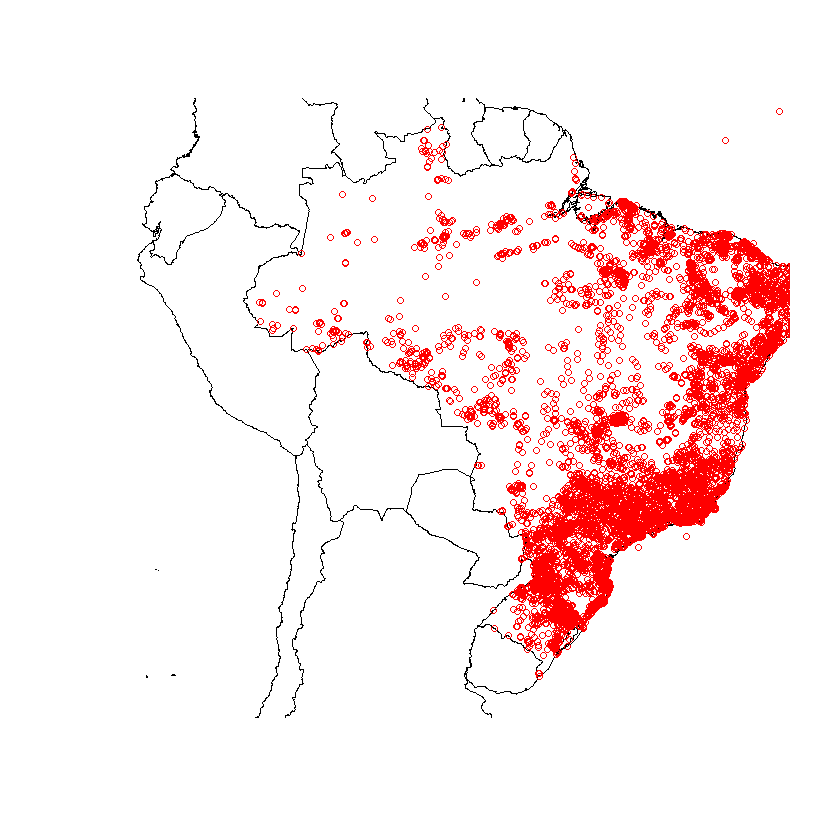

In [72]:
# recortando apenas o brasil
plot(mapa_estabelecimentos,
   xlim = c(-65, -55),
   ylim = c(-35, 5),
   asp = 1
) 

points(estabelecimentos$NU_LONGITUDE, estabelecimentos$NU_LATITUDE, col = "red", cex = .8)

In [73]:
write.csv2(mapa_estabelecimentos, 'mapa_ab.csv', row.names = FALSE)

In [74]:
cobertura_ab <- read.csv2('cobertura_AB_2007_2018.csv', header = TRUE)

In [75]:
head(cobertura_ab)

Mes,Ano,UF,MunicÃ.pio,IBGE,PopulaÃ.Ã.o,NÂº.eSF,Estim..Pop..Cob..eSF,Cob..Pop..Estimada.eSF,CH.MÃ.dico.AB,CH.Enfermeiro.AB,NÂº.eSF.equivalente,NÂº.eAB.parametrizada,Estim..Pop..Cob..AB,Cob..Pop..Estimada.AB
4,2008,AC,ACRELÃ‚NDIA,120001.0,11.520,5.0,11.520,100%,20.0,40.0,0.33,0.0,11.520,100%
4,2008,AC,ASSIS BRASIL,120005.0,5.351,2.0,5.351,100%,0.0,0.0,0,0.0,5.351,100%
4,2008,AC,BRASILÃ‰IA,120010.0,19.065,6.0,19.065,100%,110.0,120.0,1.83,0.0,19.065,100%
4,2008,AC,BUJARI,120013.0,6.543,1.0,3.450,"52,73%",40.0,40.0,0.66,0.0,5.430,"82,99%"
4,2008,AC,CAPIXABA,120017.0,8.446,2.0,6.900,"81,70%",40.0,0.0,0,0.0,6.900,"81,70%"
4,2008,AC,CRUZEIRO DO SUL,120020.0,73.948,16.0,55.200,"74,65%",40.0,80.0,0.66,0.0,57.180,"77,32%"


In [76]:
cobertura_ab_reduced <- cobertura_ab %>%
  filter(Ano == 2017 & Mes == 12) %>%
  select(IBGE, UF, MunicÃ.pio, Cob..Pop..Estimada.AB)

In [77]:
head(cobertura_ab_reduced)

IBGE,UF,MunicÃ.pio,Cob..Pop..Estimada.AB
120001.0,AC,ACRELÃ‚NDIA,100%
120005.0,AC,ASSIS BRASIL,100%
120010.0,AC,BRASILÃ‰IA,100%
120013.0,AC,BUJARI,100%
120017.0,AC,CAPIXABA,100%
120020.0,AC,CRUZEIRO DO SUL,100%


In [78]:
names(cobertura_ab_reduced)[1] <- 'code'
names(cobertura_ab_reduced)[2] <- 'pop_coberta_ab_percent'
cobertura_ab_reduced$code <- substr(as.character(cobertura_ab_reduced$code),1,6)
cobertura_ab_reduced$pop_coberta_ab_percent <- as.character(cobertura_ab_reduced$pop_coberta_ab_percent)
cobertura_ab_reduced$pop_coberta_ab_percent <- gsub("%", "", cobertura_ab_reduced$pop_coberta_ab_percent)
cobertura_ab_reduced$pop_coberta_ab_percent <- gsub(",", ".", cobertura_ab_reduced$pop_coberta_ab_percent)

In [79]:
cobertura_brasil <- merge(brasil, cobertura_ab_reduced, by = 'code', all.x = TRUE)

In [80]:
head(cobertura_brasil)

code,city,state,region,population,pop_coberta_ab_percent,MunicÃ.pio,Cob..Pop..Estimada.AB
110001,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437,RO,ALTA FLORESTA D'OESTE,"67,63%"
110002,Ariquemes,RondÃ´nia,NORTE,107345,RO,ARIQUEMES,"66,72%"
110003,Cabixi,RondÃ´nia,NORTE,6224,RO,CABIXI,100%
110004,Cacoal,RondÃ´nia,NORTE,88507,RO,CACOAL,"62,82%"
110005,Cerejeiras,RondÃ´nia,NORTE,17934,RO,CEREJEIRAS,"96,05%"
110006,Colorado do Oeste,RondÃ´nia,NORTE,18467,RO,COLORADO DO OESTE,"92,55%"


In [81]:
write.csv2(cobertura_brasil, 'brasil_cobertura.csv', row.names = FALSE)

In [82]:
cobertura_brasil$pop_coberta_ab_percent <- as.numeric(cobertura_brasil$pop_coberta_ab_percent)
cobertura_brasil$pop_coberta_ab <- floor((cobertura_brasil$population*cobertura_brasil$pop_coberta_ab_percent)/100)

Warning message in eval(expr, envir, enclos):
"NAs introduzidos por coerção"

In [83]:
head(cobertura_brasil)

code,city,state,region,population,pop_coberta_ab_percent,MunicÃ.pio,Cob..Pop..Estimada.AB,pop_coberta_ab
110001,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437,NA,ALTA FLORESTA D'OESTE,"67,63%",NA
110002,Ariquemes,RondÃ´nia,NORTE,107345,NA,ARIQUEMES,"66,72%",NA
110003,Cabixi,RondÃ´nia,NORTE,6224,NA,CABIXI,100%,NA
110004,Cacoal,RondÃ´nia,NORTE,88507,NA,CACOAL,"62,82%",NA
110005,Cerejeiras,RondÃ´nia,NORTE,17934,NA,CEREJEIRAS,"96,05%",NA
110006,Colorado do Oeste,RondÃ´nia,NORTE,18467,NA,COLORADO DO OESTE,"92,55%",NA


In [84]:
write.csv2(cobertura_brasil, 'cobertura_brasil.csv', row.names = FALSE)

In [85]:
sih <- read.csv2('SIH-Brasil-0818.csv', header = TRUE)

In [86]:
head(sih)

SP_GESTOR,SP_UF,SP_AA,SP_MM,SP_CNES,SP_NAIH,SP_PROCREA,SP_DTINTER,SP_DTSAIDA,SP_NUM_PR,...,SP_PF_DOC,SP_PJ_DOC,IN_TP_VAL,SEQUENCIA,REMESSA,SERV_CLA,SP_CIDPRI,SP_CIDSEC,SP_QT_PROC,SP_U_AIH
110009,11,2018,8,2808587,1.118101e+12,407030026,20180815,20180817,NA,...,1.239041e+14,2808587,2,11,HM11000901N201808.DTS,0,K805,0,0,0
110009,11,2018,8,2808587,1.118101e+12,407030026,20180815,20180817,NA,...,9.800160e+14,2808587,1,11,HM11000901N201808.DTS,0,K805,0,1,0
110009,11,2018,8,2808587,1.118101e+12,407030026,20180815,20180817,NA,...,0.000000e+00,2808587,1,11,HM11000901N201808.DTS,0,K805,0,1,0
110009,11,2018,8,2808587,1.118101e+12,407030026,20180815,20180817,NA,...,0.000000e+00,2808587,1,11,HM11000901N201808.DTS,0,K805,0,1,0
110009,11,2018,8,2808587,1.118101e+12,407030026,20180815,20180817,NA,...,0.000000e+00,2808587,1,11,HM11000901N201808.DTS,0,K805,0,1,0
110009,11,2018,8,2808587,1.118101e+12,407040145,20180817,20180818,NA,...,9.800163e+14,2808587,2,12,HM11000901N201808.DTS,0,K409,0,0,1


In [87]:
sih_acupuntura <- sih %>%
  filter(SP_PROCREA == 0101010044) %>%
  group_by(SP_UF) %>%
  summarise(Media = format(round(mean(SP_VALATO), 2), nsmall = 2)) %>% 
  mutate(Sigtap = 6145)
#225105 Médico acupunturista 

In [88]:
head(sih_acupuntura)

SP_UF,Media,Sigtap


225105 Médico acupunturista código


In [92]:
cliente <- read.csv2('tbFluxoDadosClientela201809.csv', sep=';', header = TRUE)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on 'tbFluxoDadosClientela201809.csv'"

In [93]:
paged_table(cliente)

CO_CLIENTELA..DS_CLIENTELA.
"01;""ATENDIMENTO DE DEMANDA ESPONTANEA"""
"02;""ATENDIMENTO DE DEMANDA REFERENCIADA"""
"03;""ATENDIMENTO DE DEMANDA ESPONTANEA E REFERENCIADA"""


In [94]:
estabelecimento_clientela <- subset(estabelecimentos, select = c('CO_CNES', 'CO_CLIENTELA'))

In [95]:
head(estabelecimento_clientela)

CO_CNES,CO_CLIENTELA
7453280,3
7450184,1
7462956,1
7462476,1
7416490,3
7462123,1


In [96]:
# profissionais de saúde

profissionais <- read.csv2('tbCargaHorariaSus201809.csv', header = TRUE)
head(profissionais)

CO_UNIDADE,CO_PROFISSIONAL_SUS,CO_CBO,TP_SUS_NAO_SUS,IND_VINCULACAO,TP_TERCEIRO_SIH,QT_CARGA_HORARIA_AMBULATORIAL,CO_CONSELHO_CLASSE,NU_REGISTRO,SG_UF_CRM,TP_PRECEPTOR,TP_RESIDENTE,NU_CNPJ_DETALHAMENTO_VINCULO,TO_CHAR.A.DT_ATUALIZACAO..DD.MM.YYYY..,CO_USUARIO,TO_CHAR.A.DT_ATUALIZACAO_ORIGEM..DD.MM.YYYY..
AP00000000000000099990010000004,1EFFD0E1186062EE,515105,S,10000,2,0,99,,,NA,NA,,01/10/2001,eneida,NA
AP00000000000000099990010000005,E93ACAD355032651,515105,S,10000,2,0,99,,,NA,NA,,10/12/2001,eneida,NA
AP00000000000000099990010000006,9D7D13462EBC2D66,1999A1,S,10000,2,40,99,,,NA,NA,,31/10/2001,eneida,NA
AP00000000000000099990010000006,DEF8D0C3756B2772,1999A1,S,10000,2,40,99,,,NA,NA,,31/10/2001,eneida,NA
BA00002914802000000000001538640,67A69EB2A0A7D21F,324210,S,10000,2,48,99,,,NA,NA,,25/09/2001,carlinda,NA
BA00002914802000000000001538640,4B9101A88F718691,324210,S,10000,2,48,99,,,NA,NA,,25/09/2001,carlinda,NA


In [97]:
profissionais$CO_CBO <- as.character(profissionais$CO_CBO)
medicos <- profissionais %>%
  select(CO_UNIDADE, CO_PROFISSIONAL_SUS, CO_CBO, TP_SUS_NAO_SUS, QT_CARGA_HORARIA_AMBULATORIAL) %>%
  filter(startsWith(CO_CBO, "2251") | startsWith(CO_CBO, "2253")  | startsWith(CO_CBO, "2253"))

In [98]:
head(medicos)

CO_UNIDADE,CO_PROFISSIONAL_SUS,CO_CBO,TP_SUS_NAO_SUS,QT_CARGA_HORARIA_AMBULATORIAL
CE0000231290000000000000047929,0B6C6813432D9673,225142,S,8
ES00000000000000000000000003930,3E9FD1ABE6A26194,225142,S,40
ES00000000000000027503747000119,0FC7DFF406F99A54,225125,S,20
MA0000210120000001862880000178,19EA60157171EA00,225124,S,20
MA0000210120000001862880000178,19EA60157171EA00,225125,S,20
MA0000211150000000004442890382,5936668BE1F5C1B8,225125,S,20


In [99]:
#|2251|Médicos Clínicos|
#|2252|Médicos Especialidades Cirurgicas|
#|2253|Médicos Dignóstico e Terapêutico|


In [100]:
#É comum que o médico possua mais de um vínculo, então não devemos confiar no resultado acima, 
#precisamos primeiros filtrar os vinculos multiplos.

medicos_unico <- medicos %>%
  distinct(CO_PROFISSIONAL_SUS)


In [101]:
head(medicos_unico)

CO_PROFISSIONAL_SUS
0B6C6813432D9673
3E9FD1ABE6A26194
0FC7DFF406F99A54
19EA60157171EA00
5936668BE1F5C1B8
B5B23E4ED1D1896A


In [103]:
#Qual a média de vinculos, maximo e mínimo encontrados nos dados?

medicos_vinculos <- medicos %>%
  group_by(CO_PROFISSIONAL_SUS) %>%
  summarise(Vinculos = n())

In [104]:
head(medicos_vinculos)

CO_PROFISSIONAL_SUS,Vinculos
00000B89F3840DB3,1
00005AA631AF8AB1,1
000081913134B2FD,2
000097B131348BFE,2
00010160B6D9A7BF,1
0001022809EFF22A,1


In [106]:
mean(medicos_vinculos$Vinculos)

[1] 2.327664

In [107]:
cobertura_ab <- read.csv2('cobertura_AB_2007_2018.csv', header = TRUE)
head(cobertura_ab)

Mes,Ano,UF,MunicÃ.pio,IBGE,PopulaÃ.Ã.o,NÂº.eSF,Estim..Pop..Cob..eSF,Cob..Pop..Estimada.eSF,CH.MÃ.dico.AB,CH.Enfermeiro.AB,NÂº.eSF.equivalente,NÂº.eAB.parametrizada,Estim..Pop..Cob..AB,Cob..Pop..Estimada.AB
4,2008,AC,ACRELÃ‚NDIA,120001.0,11.520,5.0,11.520,100%,20.0,40.0,0.33,0.0,11.520,100%
4,2008,AC,ASSIS BRASIL,120005.0,5.351,2.0,5.351,100%,0.0,0.0,0,0.0,5.351,100%
4,2008,AC,BRASILÃ‰IA,120010.0,19.065,6.0,19.065,100%,110.0,120.0,1.83,0.0,19.065,100%
4,2008,AC,BUJARI,120013.0,6.543,1.0,3.450,"52,73%",40.0,40.0,0.66,0.0,5.430,"82,99%"
4,2008,AC,CAPIXABA,120017.0,8.446,2.0,6.900,"81,70%",40.0,0.0,0,0.0,6.900,"81,70%"
4,2008,AC,CRUZEIRO DO SUL,120020.0,73.948,16.0,55.200,"74,65%",40.0,80.0,0.66,0.0,57.180,"77,32%"


In [124]:
#de todos os valores recebidos, qual a porcentagem correspondente à Atenção Básica?
fns$vlLiquido <- as.numeric(as.character(fns$vlLiquido))
fns_reduced <- fns %>%
  filter(ANO == 2017) %>%
  group_by(MUNICIPIO) %>%
  summarise(Total_Investido = sum(vlLiquido))
fns_tmp <- fns %>%
  filter(ANO == 2017 & nome == 'ATENÇÃO BÁSICA') %>%
  select(MUNICIPIO, vlLiquido)

In [125]:
head(fns_reduced)


MUNICIPIO,Total_Investido
110001,4880383
110002,22314782
110003,1406911
110004,17907238
110005,4084366
110006,3492792


In [126]:
fns_reduced <- merge(fns_reduced,fns_tmp)
names(fns_reduced)[1] <- 'code'
names(fns_reduced)[3] <- 'Total_AB'

In [129]:
fns_reduced$percent_ab <- (fns_reduced$Total_AB/fns_reduced$Total_Investido)*100

In [132]:
cobertura_brasil <- merge(brasil, cobertura_ab_reduced, all.x = TRUE)

In [133]:
head(cobertura_brasil)

code,city,state,region,population,pop_coberta_ab_percent,MunicÃ.pio,Cob..Pop..Estimada.AB,pop_coberta_ab
110001,Alta Floresta D'Oeste,RondÃ´nia,NORTE,25437,NA,ALTA FLORESTA D'OESTE,"67,63%",NA
110002,Ariquemes,RondÃ´nia,NORTE,107345,NA,ARIQUEMES,"66,72%",NA
110003,Cabixi,RondÃ´nia,NORTE,6224,NA,CABIXI,100%,NA
110004,Cacoal,RondÃ´nia,NORTE,88507,NA,CACOAL,"62,82%",NA
110005,Cerejeiras,RondÃ´nia,NORTE,17934,NA,CEREJEIRAS,"96,05%",NA
110006,Colorado do Oeste,RondÃ´nia,NORTE,18467,NA,COLORADO DO OESTE,"92,55%",NA


In [134]:
write.csv2(cobertura_brasil, 'brasil_basico.csv', row.names = FALSE)

In [114]:
#recursos repassados pelo Fundo Nacional de Saúde (FNS) para os municípios. O valor que já representou no passado quase 80% do orçamento de saúde dos municípios, hoje está na média dos 30%.
fns <- read.csv2('investimentos-sus-2012-2017.csv', header = TRUE)
head(fns)

nome,vlTotal,vlDesconto,vlLiquido,ANO,MUNICIPIO
ASSISTÃŠNCIA FARMACÃŠUTICA,124205.4,0,124205.4,2012,110001
ATENÃ‡ÃƒO BÃSICA,2572117.87,0,2572117.87,2012,110001
INVESTIMENTO,60000,0,60000,2012,110001
MÃ‰DIA E ALTA COMPLEXIDADE AMBULATORIAL E HOSPITALAR,2013077.58,960,2012117.58,2012,110001
VIGILÃ‚NCIA EM SAÃšDE,246711.2,0,246711.2,2012,110001
ASSISTÃŠNCIA FARMACÃŠUTICA,436259.16,0,436259.16,2012,110002


In [135]:
fns$vlLiquido <- as.numeric(as.character(fns$vlLiquido))
fns_reduced <- fns %>%
  filter(ANO == 2017) %>%
  group_by(MUNICIPIO) %>%
  summarise(Total_Investido = sum(vlLiquido))


In [136]:
head(fns_reduced)

MUNICIPIO,Total_Investido
110001,4880383
110002,22314782
110003,1406911
110004,17907238
110005,4084366
110006,3492792


In [137]:
fns_tmp <- fns %>%
  filter(ANO == 2017 & nome == 'ATENÇÃO BÁSICA') %>%
  select(MUNICIPIO, vlLiquido)

In [138]:
fns_reduced <- merge(fns_reduced,fns_tmp)
names(fns_reduced)[1] <- 'code'
names(fns_reduced)[3] <- 'Total_AB'

In [139]:
fns_reduced$percent_ab <- (fns_reduced$Total_AB/fns_reduced$Total_Investido)*100

In [140]:
fns_reduced


code,Total_Investido,Total_AB,percent_ab
